In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data Analytics/Dataset/Dataset/laptop_price.csv", encoding = 'latin')
df

In [ ]:
df.info()

**Data** **Cleaning**

In [ ]:
#df.dropna
#df.drop
df.drop(columns = ['laptop_ID','Product'], inplace=True)

In [ ]:
df.sample()

In [ ]:
df.isnull().sum()

In [ ]:
df.duplicated().sum()

In [ ]:
df.shape

In [ ]:
#89.07 INR >> 1 euro
#299 * 89.07 = INR

In [ ]:
df['Price_euros'] = round(df['Price_euros'] * 89.07).astype('int')

In [ ]:
df.head(5)

In [ ]:
df.rename(columns = {'Price_euros' : 'Price'}, inplace = True)

In [ ]:
df.head()

In [ ]:
#Ram Coverting object column to numeric column
df['Ram'].value_counts()

In [ ]:
a = '4GB'
type(a)

In [ ]:
a.replace("GB","")

In [ ]:
(lambda a:a.replace("GB",""))('16GB')

In [ ]:
df['Ram'] = df['Ram'].apply(lambda a:a.replace("GB","")).astype('int')

In [ ]:
df.head(3)

In [ ]:
#EDA
df['Ram'].value_counts()

In [ ]:
sns.barplot(x=df['Ram'],y=df['Price'])
plt.title("Ram vs Price")
plt.gca().set_facecolor('#f0f0f0')

In [ ]:
df['Weight'] = df['Weight'].apply(lambda a:a.replace("kg","")).astype(float)

In [ ]:
df.head(3)

In [ ]:
df['Weight'].value_counts()

In [ ]:
sns.displot(x = df['Weight'],kde = True)
plt.gca().set_facecolor('#f0f0f0')

In [ ]:
sns.scatterplot(x = df['Weight'], y = df['Price'])
plt.title("Weight vs Price")
plt.gca().set_facecolor('#f0f0f0')
plt.show()

**DOC**

In [ ]:
df.info()

In [ ]:
df.sample()

In [ ]:
df.shape

In [ ]:
#FIltering for the companies which has repeated more than 10 times in the dataset
df = df[df.groupby('Company')["Company"].transform('count') > 10]

In [ ]:
df['Company'].value_counts()

In [ ]:
df.shape

In [ ]:
sns.barplot(x = df['Company'], y = df['Price'])
plt.title("Company vs Price")
plt.gca().set_facecolor('#f0f0f0')
plt.show()

**Document**

In [ ]:
df.sample()

In [ ]:
df['TypeName'].value_counts()

In [ ]:
df['TypeName'].value_counts().plot(kind = 'bar')
plt.gca().set_facecolor('#f0f0f0')

In [ ]:
sns.barplot(x = df['TypeName'], y = df['Price'])
plt.xticks(rotation = 90)
plt.title("TypeName vs Price")
plt.gca().set_facecolor('#f0f0f0')
plt.show()

In [ ]:
df['Inches'].value_counts()

In [ ]:
df = df[df.groupby('Inches')["Inches"].transform('count') > 10]

In [ ]:
df.shape #After FIltering

In [ ]:
df['Inches'].value_counts()

In [ ]:
#Inches VS Prices
sns.scatterplot(x = df['Inches'], y=df['Price'], palette = 'viridis')
plt.title('Inches vs Prices')
plt.gca().set_facecolor('#f0f0f0')
plt.show()

In [ ]:
#Inches vs Price
sns.barplot(x = df['Inches'],y = df['Price'], palette = 'viridis')
plt.title('Inches vs Price')
plt.gca().set_facecolor('#f0f0f0')
plt.show()

In [ ]:
df.sample()

In [ ]:
df['ScreenResolution'].value_counts()
#x_res = 1920, y_res = 1080

In [ ]:
a = 'IPX Panel Full HD / Touchscreen 1920x1080'
#X_res = 1920 , Y_res = 1080

In [ ]:
a.split()[-1]

In [ ]:
a.split()[-1].split('x')

In [ ]:
a.split()[-1].split('x')[0] #x_res

In [ ]:
a.split()[-1].split('x')[1] #y_res

In [ ]:
(lambda x : x.split()[-1].split('x')[0])('1920x1080')   #x_res

In [ ]:
(lambda x : x.split()[-1].split('x')[1])('1920x1080') #y_res

In [ ]:
df['X_res'] = df['ScreenResolution'].apply((lambda x : x.split()[-1].split('x')[0])).astype('int')

In [ ]:
df['Y_res'] = df['ScreenResolution'].apply((lambda x : x.split()[-1].split('x')[1])).astype('int')

In [ ]:
df.sample()

**Lambda Theory and Practical**

In [ ]:
#Add a column for ppi
#X_res
#Y_res
#Inches

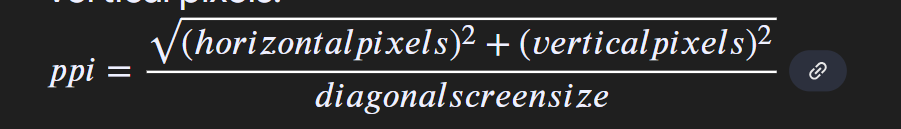

In [ ]:
df['ppi'] = round(((df['X_res']**2) + (df['Y_res']**2))**0.5 / df['Inches'],2)

In [ ]:
df.sample(4)

In [ ]:
#ppi vs Price analysis
df['ppi'].value_counts()

In [ ]:
sns.regplot(x=df['ppi'], y=df['Price'])
plt.title('Inches vs Price')
plt.gca().set_facecolor('#f0f0f0')
plt.show()

# **Interview Questions**

In [ ]:
df['ScreenResolution'].value_counts()

In [ ]:
a = 'IPS Panel Full HD / Touchscreen 1920x1080'
#If there is IPS in this str return 1 else 0
a.split()[0]


In [ ]:
(lambda a:1 if 'IPS' in a else 0)('IPS Panel Full HD / Touchscreen 1920x1080')

In [ ]:
df['IPS'] = df['ScreenResolution'].apply(lambda a: 1 if 'IPS' in a else 0)

In [ ]:
df.sample(4)

In [ ]:
df['TouchScreen'] = df['ScreenResolution'].apply(lambda a: 'Yes' if "Touchscreen" in a else 'No')

In [ ]:
df.sample(3)

In [ ]:
df['TouchScreen'].value_counts().plot(kind = 'bar')
plt.gca().set_facecolor('#f0f0f0')

In [ ]:
df.drop(columns = ['ScreenResolution','Inches','X_res','Y_res'], inplace = True)

In [ ]:
df.sample(2)

In [ ]:
df.shape

In [ ]:
df['Cpu'].value_counts().plot(kind = 'bar')

In [ ]:
df['Cpu'].value_counts()

In [ ]:
a = 'Intel Core i5 7200U 2.5GHz'

In [ ]:
a.split()

In [ ]:
a.split()[0:3]

In [ ]:
" ".join(a.split()[0:3])

In [ ]:
(lambda a:" ".join(a.split()[0:3]))('AMD A6-Series 7310 2GHz	')

In [ ]:
df['Cpu'] =  df['Cpu'].apply(lambda a:" ".join(a.split()[0:3]))

In [ ]:
df['Cpu'].value_counts()

In [ ]:
#Will filter the AMD cpu w.r.t the Series
#AMD A9-Series 9420  >> AMD A-Series
#AMD E-Series 9000   >> AMD E-Series
#AMD FX 8800P        >> AMD F-Series

In [ ]:
def fetch_pro(text):
  if text == 'Intel Core i7' or text == 'Intel Core i5' or text ==  'Intel Core i3':
    return text
  elif text.split()[0] == 'Intel':
    return "Other Intel Processor"
  else:
    if text[4] == 'E':
        return "AMD E-Series"
    elif text[4] == 'A':
        return "AMD A-Series"
    elif text[4] == 'F':
          return "AMD F-Series"
    else:
          return "AMD Ryzen Series"

In [ ]:
df['Cpu'] = df['Cpu'].apply(fetch_pro)

In [ ]:
df.sample(3)

In [ ]:
df['Cpu'].value_counts().plot(kind = 'bar')
plt.gca().set_facecolor('#f0f0f0')

In [ ]:
sns.barplot(x = df['Cpu'], y = df['Price'])
plt.title('CPU vs Price')
plt.gca().set_facecolor('#f0f0f0')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
a = 'Intel Celeron Dual'
a.split()[0]

In [ ]:
b = 'AMD E-Series E2-6110'
b[4]

In [ ]:
df.sample(3)

In [ ]:
df['Gpu'].value_counts()

In [ ]:
df['Gpu'].value_counts().plot(kind = 'bar')

In [ ]:
a = 'Intel HD Graphics 620'
a.split()

In [ ]:
a.split()[0:2]

In [ ]:
" ".join(a.split()[0:2])

In [ ]:
(lambda a :" ".join(a.split()[0:2]))('AMD Radeon R7')

In [ ]:
df['Gpu'] = df['Gpu'].apply(lambda a:" ".join(a.split()[0:2]))

In [ ]:
df['Gpu'].value_counts()

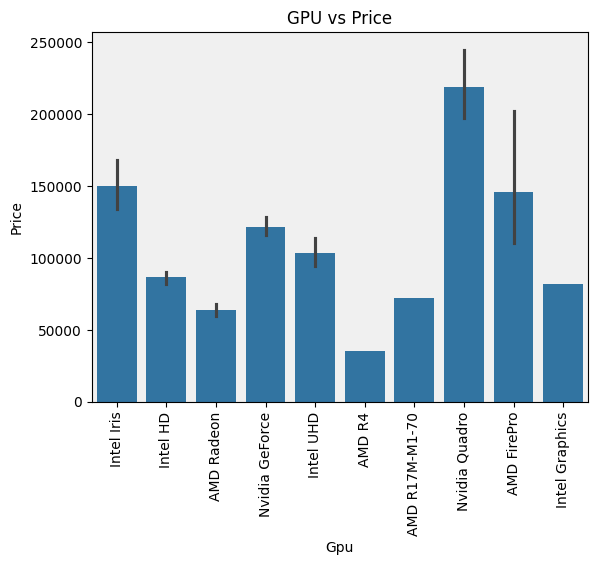

In [ ]:
sns.barplot(x = df['Gpu'], y = df['Price'])
plt.title('GPU vs Price')
plt.gca().set_facecolor('#f0f0f0')
plt.xticks(rotation = 90)
plt.show()

# **Document**

In [ ]:
df.sample()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,ppi,IPS,TouchScreen
195,HP,Notebook,Intel Core i5,8,1TB HDD,Nvidia GeForce,Windows 10,2.5,81410,127.34,1,No


In [ ]:
df['OpSys'].value_counts()

,count
OpSys,
Windows 10,1022
No OS,63
Linux,62
Windows 7,45
Chrome OS,22
macOS,8
Mac OS X,3
Windows 10 S,2


In [ ]:
#Wherever we have Windows 10 or Window 10 S >>> Windows 10
#Windows 7 >> Windows 7
#if we have Mac OS X	or macOS >>  mac OS
#No OS >> No OS
#Linux >> Linux
#Chrome OS >>> Chrome OS

In [ ]:
def os(text):
  if text == 'Windows 10' or text == 'Windows 10 S':
    return 'Windows 10'
  elif text == 'macOS' or text == 'Mac OS X':
    return 'Macos'
  elif text == 'No OS':
    return 'No OS'
  elif text == 'Linux':
    return 'Linux'
  else:
    return 'Chrome OS'

In [ ]:
os('Windows 10 S')

'Windows 10'

In [ ]:
df['OpSys'] = df['OpSys'].apply(os)

In [ ]:
df.sample(3)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,ppi,IPS,TouchScreen
894,MSI,Gaming,Intel Core i7,16,512GB SSD + 2TB HDD,Nvidia GeForce,Windows 10,2.43,235946,254.67,1,No
766,Asus,Notebook,Other Intel Processor,4,1TB HDD,Nvidia GeForce,Windows 10,2.80,41893,90.58,0,No
793,Lenovo,2 in 1 Convertible,Intel Core i5,8,256GB SSD,AMD Radeon,Windows 10,2.08,85418,141.21,0,Yes


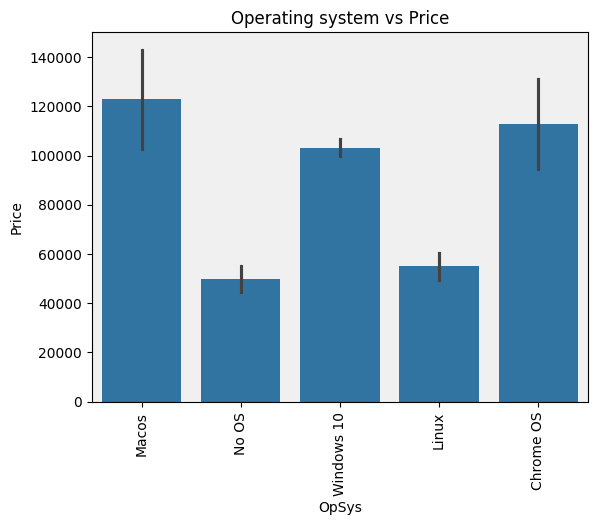

In [ ]:
sns.barplot(x = df['OpSys'], y = df['Price'])
plt.title('Operating system vs Price')
plt.gca().set_facecolor('#f0f0f0')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
df[df['OpSys'] == 'Windows 10']['Price'].describe()

,Price
count,1024.000000
mean,103080.923828
std,58599.846356
min,17093.000000
25%,58697.000000
50%,89983.500000
75%,133516.000000
max,436354.000000


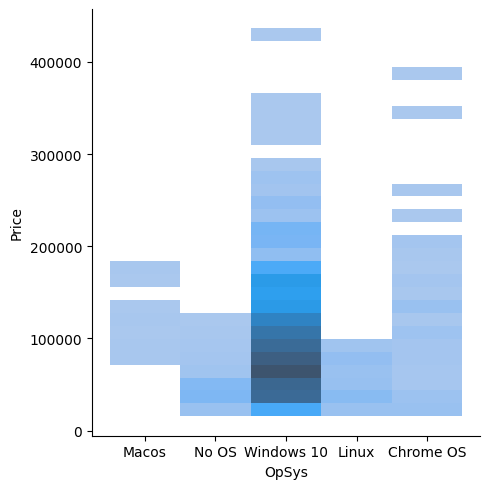

In [ ]:
sns.displot(data = df, x = 'OpSys', y = 'Price')

In [ ]:
df.sample(3)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,ppi,IPS,TouchScreen
707,Lenovo,Workstation,Intel Core i7,16,512GB SSD,Nvidia Quadro,Chrome OS,2.18,165225,141.21,0,No
105,HP,Notebook,Intel Core i5,6,256GB SSD,Nvidia GeForce,Windows 10,1.58,58697,157.35,1,No
1194,Dell,2 in 1 Convertible,Intel Core i5,8,256GB SSD,Intel HD,Windows 10,1.60,106795,165.63,1,Yes


In [ ]:
#Flash Storage
#SDD
#HDD
#Hybrid
df['Memory'].value_counts()

,count
Memory,
256GB SSD,387
1TB HDD,221
500GB HDD,131
512GB SSD,103
128GB SSD + 1TB HDD,93
128GB SSD,73
256GB SSD + 1TB HDD,73
32GB Flash Storage,30
2TB HDD,16


In [ ]:
df['Memory'].str.split('+',n=1,expand = True).sample(5)

,0,1
1179,500GB HDD,None
839,128GB HDD,None
815,256GB SSD,None
601,500GB HDD,None
356,1TB HDD,None


In [ ]:
df['first'] = new[0]
df['first']

NameError: name 'new' is not defined

In [ ]:
df['first'].str.strip()

In [ ]:
df['first'].apply(lambda x:1 if "HDD" in x else 0)

In [ ]:
# SSD
# HDD
# Hybrid
# Flash Storage
new=df['Memory'].str.split('+',n=1,expand=True)
df['first']=new[0]
df['first']=df['first'].str.strip()
df['second']=new[1]

df['Layer1HDD']=df['first'].apply(lambda x:1 if "HDD" in x else 0) #
df['Layer1SSD']=df['first'].apply(lambda x:1 if "SSD" in x else 0)
df['Layer1Hybrid']=df['first'].apply(lambda x:1 if "Hybrid" in x else 0)
df['Layer1Flash_Storage']=df['first'].apply(lambda x:1 if "Flash Storage" in x else 0)

df['first']=df['first'].str.replace(r'\D','',regex=True)

df['second'].fillna("0",inplace=True)

df['second']=df['second'].str.strip()
df['Layer2HDD']=df['second'].apply(lambda x:1 if "HDD" in x else 0)
df['Layer2SSD']=df['second'].apply(lambda x:1 if "SSD" in x else 0)
df['Layer2Hybrid']=df['second'].apply(lambda x:1 if "Hybrid" in x else 0)
df['Layer2Flash_Storage']=df['second'].apply(lambda x:1 if "Flash Storage" in x else 0)

df['second']=df['second'].str.replace(r'\D','',regex=True)

df['first']=df['first'].astype('int')
df['second']=df['second'].astype('int')

df['HDD']=df['first']*df['Layer1HDD']+df['second']*df['Layer2HDD']

df['SSD']=df['first']*df['Layer1SSD']+df['second']*df['Layer2SSD']

df['Hybrid']=df['first']*df['Layer1Hybrid']+df['second']*df['Layer2Hybrid']

df['Flash_Storage']=df['first']*df['Layer1Flash_Storage']+df['second']*df['Layer2Flash_Storage']

df.drop(columns=['first','second','Layer1HDD','Layer1SSD','Layer1Hybrid','Layer1Flash_Storage',
                 'Layer2HDD','Layer2SSD','Layer2Hybrid','Layer2Flash_Storage'],inplace=True)

In [ ]:
df.sample(5)

In [ ]:
df.to_csv("Laptop_Cleaned.csv")